In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn import tree


In [277]:
data = pd.read_csv('./train.csv')

In [278]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [279]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [280]:
data.shape

(891, 12)

In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


changing sex to gender

In [282]:
def genderize(df):
    df.rename(columns={'Sex': 'Gender','sex':'gender'},inplace=True)
genderize(data)

In [283]:
def drop_unrelevant_cols(df):
    df.drop(columns=['Name', 'PassengerId','Ticket'], axis=1, inplace=True)

In [284]:
def dummy_cols (df):
    df= pd.get_dummies(data=df, columns=['Gender','Embarked'], drop_first=True)
    return df

In [285]:
#combining Sbps and Parch into Fam
def combining_sbps_parch_to_fam(df):
    df['Fam']= df['Parch'] + df['SibSp']
    df.drop(['Parch', 'SibSp'], axis=1, inplace=True)

In [286]:
def drop_cabin(df):
    df.drop(columns=['Cabin'], axis=1, inplace=True)

In [287]:
genderize(data)
drop_unrelevant_cols(data)
combining_sbps_parch_to_fam(data)
data = dummy_cols(data)
drop_cabin(data)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


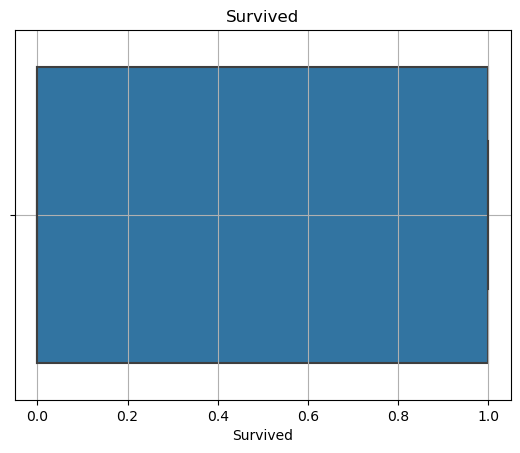

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


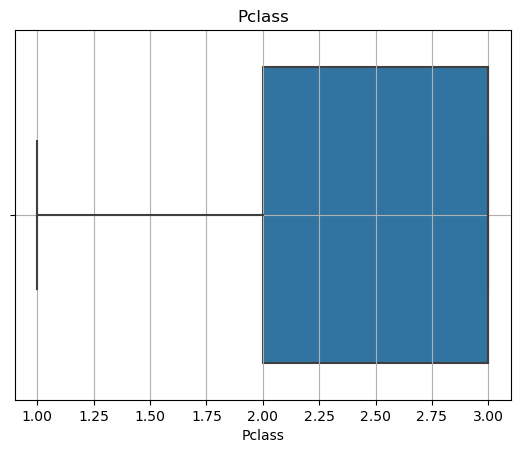

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


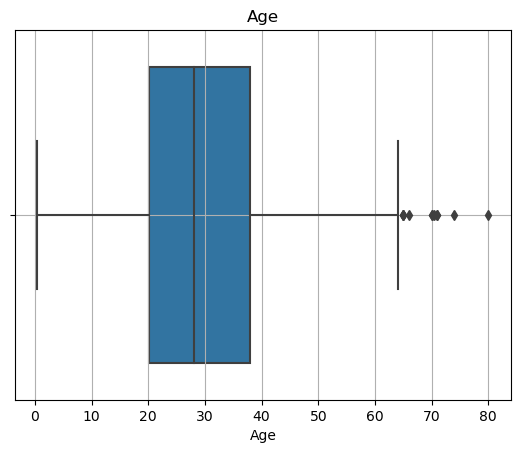

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


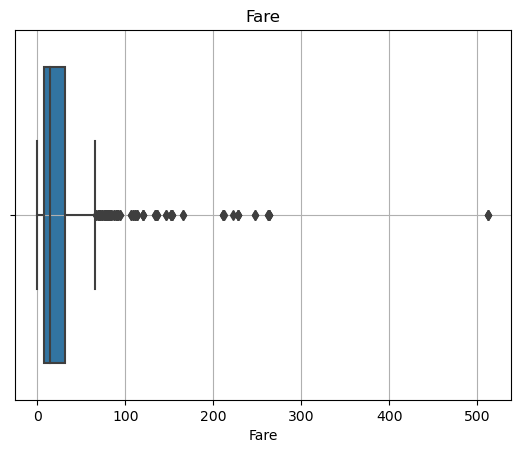

In [288]:
#Checking for outliers
categories = ['Survived', 'Pclass', 'Age', 'Fare' ]
def checking_outliers(categories):
    for c in categories:
        sns.boxplot(data[c])
        plt.title(f"{c}")
        plt.grid() 
        plt.show()
checking_outliers(categories)

In [289]:
#Replacing outliers in Fare to the avg of the outliers
avg = (data['Fare'][(data['Fare'] > 85) & (data['Fare'] <= 300)]).mean()
data['Fare'][data['Fare'] > 85] = avg

C:\Users\Owner\AppData\Local\Temp\ipykernel_8304\4151408089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare'][data['Fare'] > 85] = avg


In [290]:
#Binning age column
def bins (df):
    df.loc[df['Age']<=5, 'Age'] = 1
    df.loc[(df['Age'] > 5) & (df['Age'] <= 20), 'Age']=2
    df.loc[(df['Age'] > 20) & (df['Age'] <=64), 'Age']=3
    df.loc[(df['Age'] > 64) & (df['Age'] <= 80), 'Age']=4
    

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


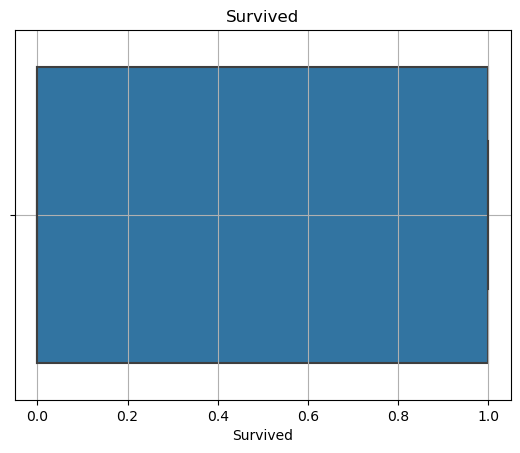

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


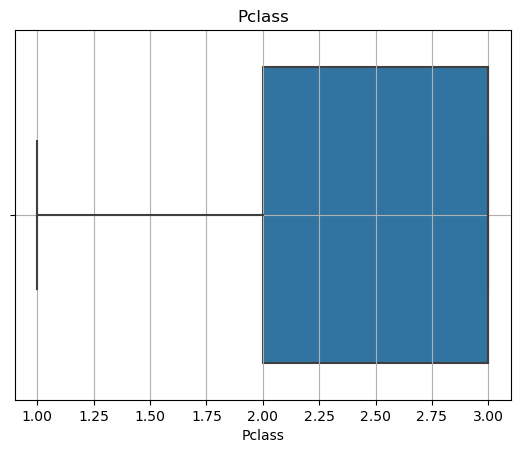

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


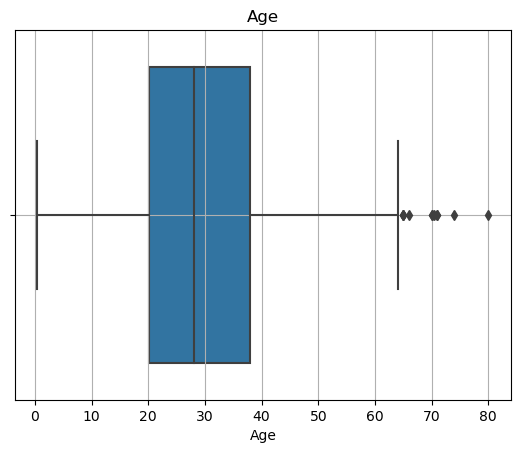

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


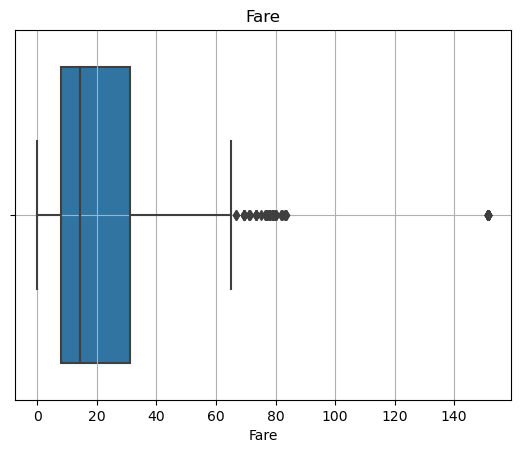

In [291]:
checking_outliers(categories)
bins(data)


<AxesSubplot:>

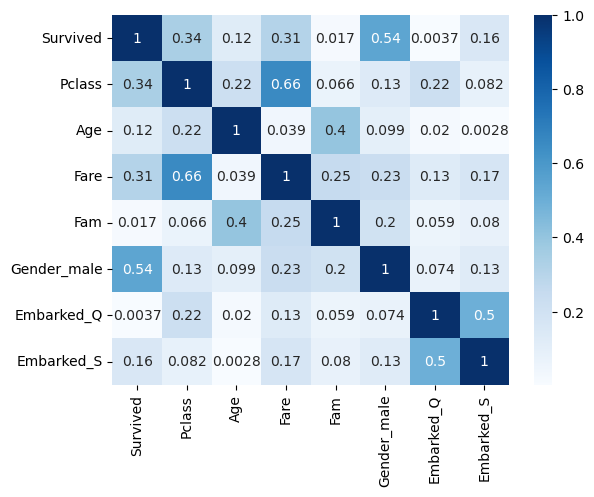

In [292]:
#Correlation heatmap

corr = abs(data.corr())
sns.heatmap(corr, annot=True, cmap='Blues')

In [293]:
#Dropping two columns that had weak correlation in above heatmap

data.drop(columns=['Fam', 'Embarked_Q'], axis=1, inplace=True)

([<matplotlib.axis.XTick at 0x1ac84e99610>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

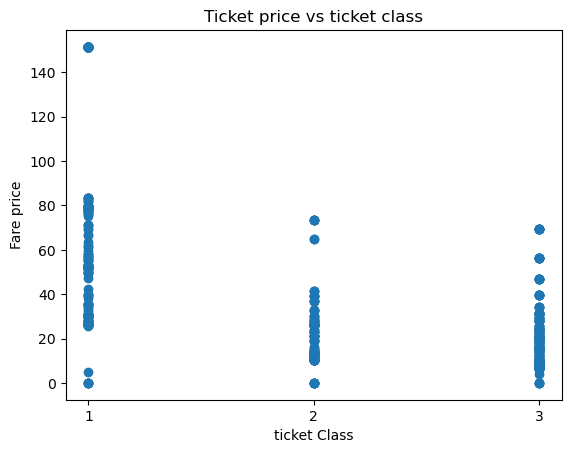

In [294]:
# Hadassa's Scatter plot to see if fare determines class
plt.scatter(x=data['Pclass'], y=data['Fare'])
plt.xlabel('ticket Class')
plt.ylabel('Fare price')
plt.title('Ticket price vs ticket class')
plt.xticks([1,2,3])

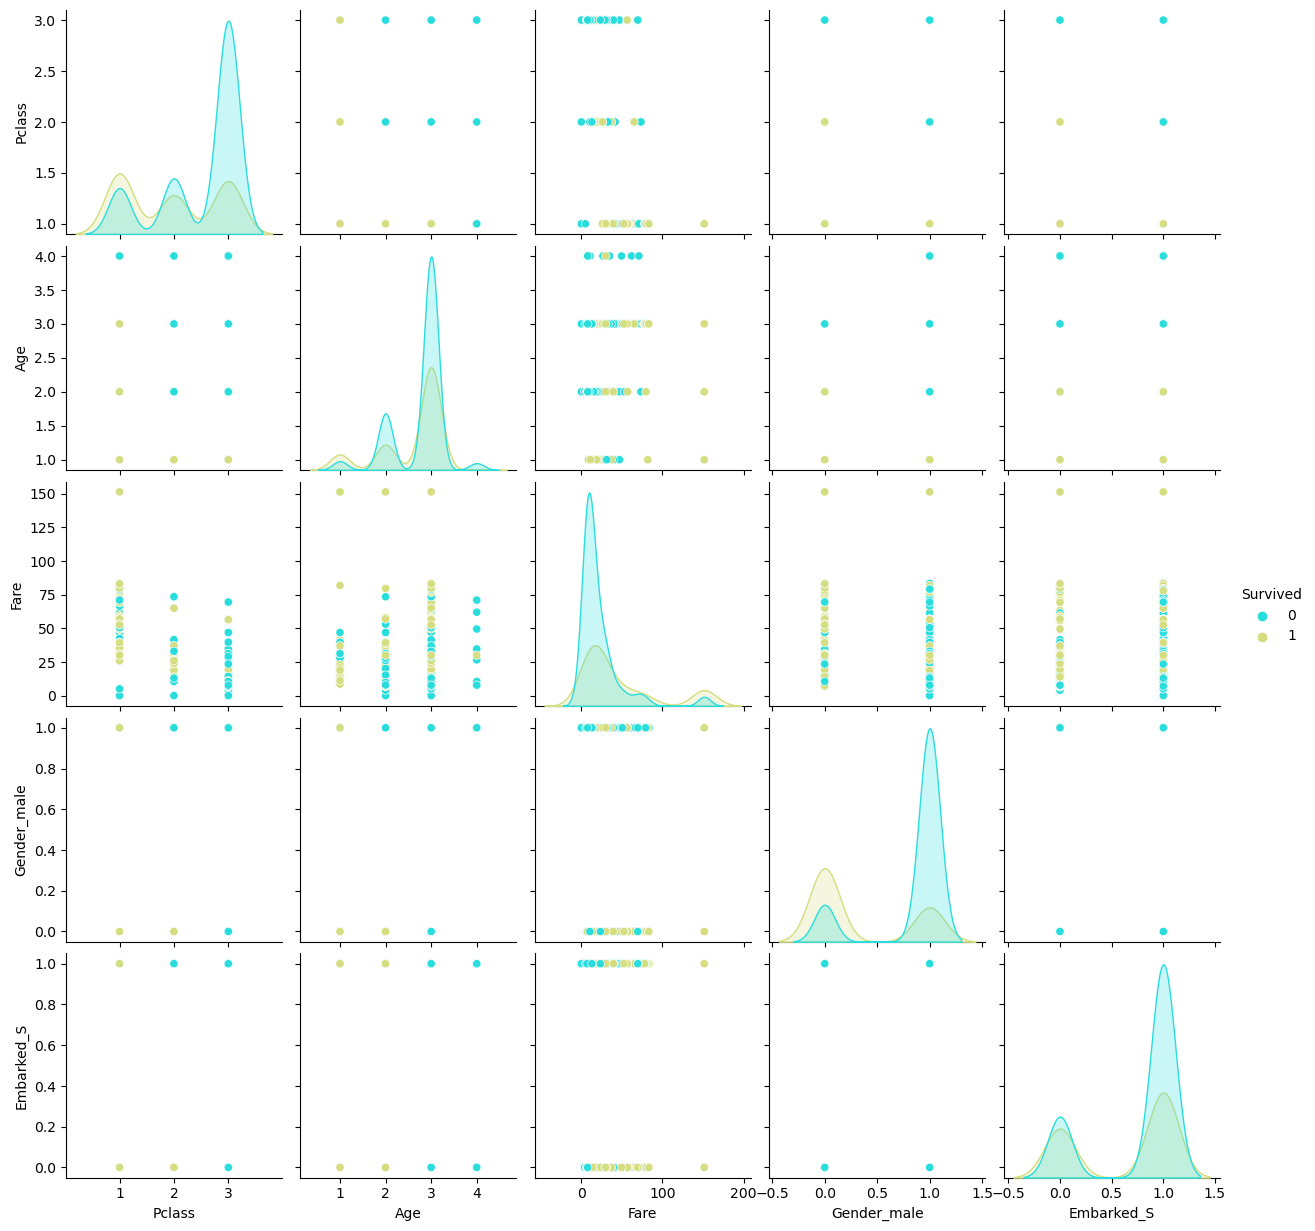

In [295]:
#Shani's pairplot to show relationship between each two columns grouped by target

sns.pairplot(data,hue='Survived',palette='rainbow')


In [296]:
data['Fare'], cut_bin = pd.qcut(data['Fare'], q = 6, labels = [1, 2, 3, 4, 5, 6],retbins = True)
data.head()

,Survived,Pclass,Age,Fare,Gender_male,Embarked_S
0,0,3,3.0,1,1,1
1,1,1,3.0,6,0,0
2,1,3,3.0,2,0,1
3,1,1,3.0,6,0,1
4,0,3,3.0,2,1,1


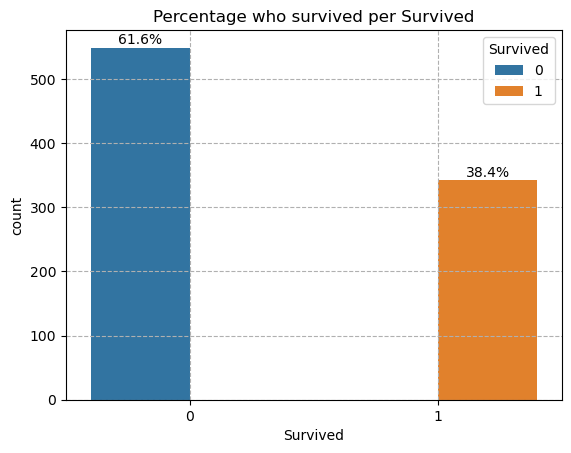

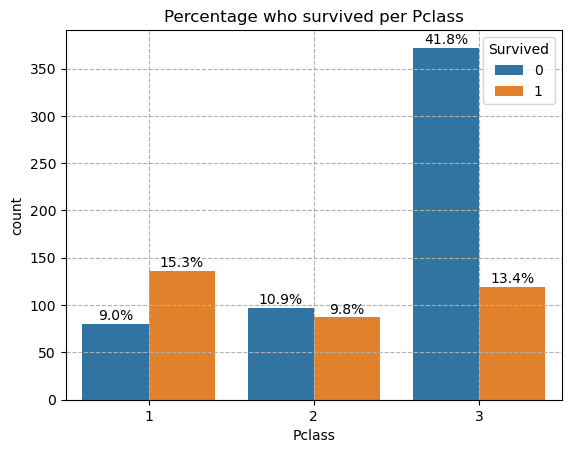

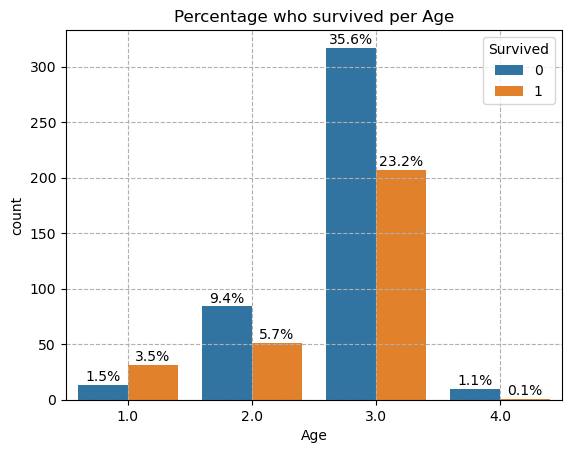

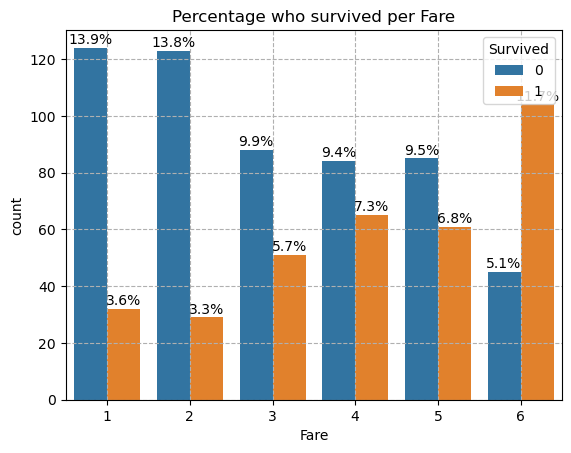

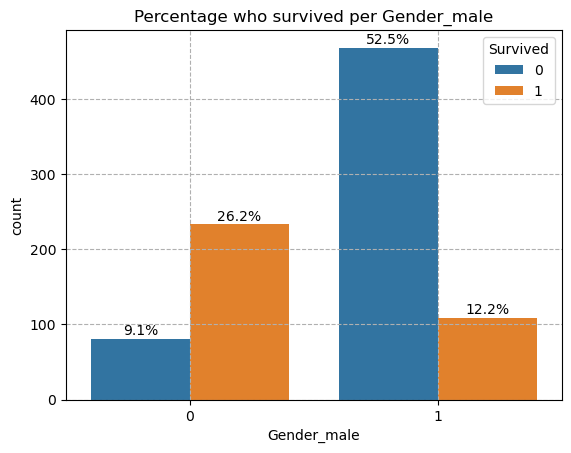

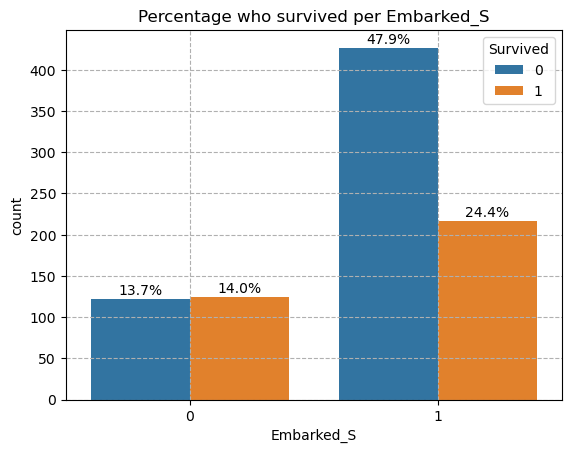

In [304]:
for each in data.columns:
    ax=sns.countplot(x=each, data=data, hue='Survived')
    plt.grid(True, linestyle='--')
    plt.title("Percentage who survived per "+ each)
    total = len(data)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    plt.show()

In [298]:
# Dividing data into feature and target columns
def create_feature_target(df):
    X = df.drop("Survived", axis=1)
    y = df["Survived"]
    return X, y

In [299]:
X, y = create_feature_target(data)

In [300]:
# scaling the data
scaler = MinMaxScaler()
scaler.fit(X)

def scale(df):
    df = pd.DataFrame(scaler.transform(df), columns=df.columns)
    return df

In [301]:
X = scale(X)
X.head()

,Pclass,Age,Fare,Gender_male,Embarked_S
0,1.0,0.666667,0.0,1.0,1.0
1,0.0,0.666667,1.0,0.0,0.0
2,1.0,0.666667,0.2,0.0,1.0
3,0.0,0.666667,1.0,0.0,1.0
4,1.0,0.666667,0.2,1.0,1.0
